In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

Сгенерируем данные

In [2]:
x = np.arange(0,50).reshape(-1, 1)

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))

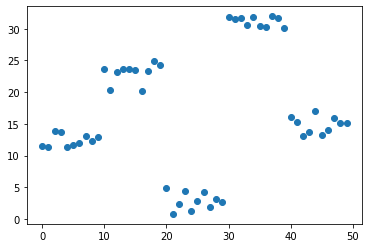

In [3]:
plt.plot(x, y ,'o');

Алгортим: 
* Генерируем предсказания
* Вычисляем loss
* Вычисляем псевдо-остатки
* Обучаем модель на псевдо-остатках
* Вычисляем коэффицент
* Повторить!

Для примера возьмем квадратичную функцию ошибки
$$L=\frac{1}{2}{\sum^{n}_{i=1}(y_{i}-y^{pred}_{i})^{2}}$$

In [4]:
def compute_loss(y, y_pred): 
    return (((y - y_pred) ** 2) / 2).sum()

Как будем инициализировать модель? Возьмем среднее

Почему среднее?
$$L'={\sum^{n}_{i=1}(y_{i}-с)}=0$$
$$\sum^{n}_{i=1}c = \sum^{n}_{i=1}y_{i}$$
$$nc = \sum^{n}_{i=1}y_{i}$$
$$c = \frac{\sum^{n}_{i=1}y_{i}}{n}$$

In [5]:
y_pred = np.array([y.mean()] * len(y))
compute_loss(y, y_pred)

2357.343332116512

In [6]:
y.mean()

16.88263100209483

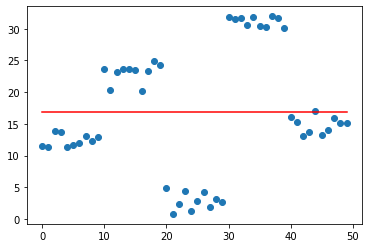

In [7]:
plt.plot(x, y, 'o')
plt.plot(x, y_pred, color='r')

Чтобы вычислить псевдо-остатки нам понадобится производная loss

In [8]:
def loss_gradient(y, y_pred): 
    return -(y - y_pred)

In [9]:
residuals = -loss_gradient(y, y_pred)

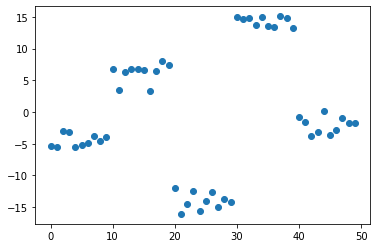

In [10]:
plt.plot(x, residuals ,'o');

Выберем и обучим модель

In [11]:
regressor = DecisionTreeRegressor(max_depth=1) 
regressor.fit(x, residuals)

DecisionTreeRegressor(max_depth=1)

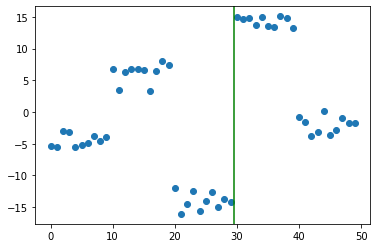

In [12]:
plt.plot(x, residuals, 'o')
plt.axvline(regressor.tree_.threshold[0], color='g')

In [13]:
np.unique(regressor.predict(x))

array([-4.10791276,  6.16186914])

In [14]:
leaf1_index = np.where(x <= regressor.tree_.threshold[0])[0]
leaf2_index = np.where(x > regressor.tree_.threshold[0])[0]
leaf1_output = residuals[leaf1_index].mean() 
leaf2_output = residuals[leaf2_index].mean()
leaf1_output, leaf2_output

(-4.107912761962425, 6.1618691429436385)

In [15]:
new_y_pred = regressor.predict(x)
compute_loss(residuals, new_y_pred)

1724.5328098704958

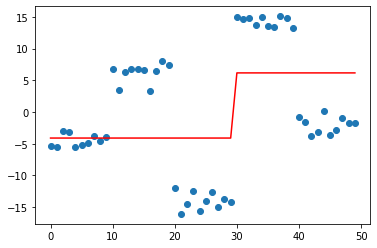

In [16]:
plt.plot(x, residuals, 'o')
plt.plot(x, new_y_pred, color='r')

Вычислим коэффициент

In [17]:
losses = [] 
for i in np.arange(0, 100, 0.01):      
    losses.append(compute_loss(y, y_pred + i * new_y_pred)) 
np.argmin(losses)

100

In [18]:
np.arange(0, 100, 0.01)[100] 

1.0

In [19]:
y_pred = y_pred + new_y_pred

In [20]:
compute_loss(y, y_pred).mean() 

1724.5328098704958

Соберем все вместе!

In [21]:
def gradient_boost_mse(x, y, M): 
    # 1 init constant prediction
    y_pred = np.array([y.mean()]*len(y)) 
    print(compute_loss(y, y_pred))
    # 2 main cycle
    for i in range(M): 
        # 2.1 compute pseudo-residuals
        residuals = -loss_gradient(y, y_pred) 
        # 2.2 train weakmodel
        regressor = DecisionTreeRegressor(max_depth=1) 
        regressor.fit(x, residuals)
        # 2.3 gamma = 1
        gamma = 1
        # 2.4 update model
        y_pred = y_pred + gamma * regressor.predict(x)  
        print(compute_loss(y, y_pred).mean())

        xa = x.ravel()
        order = np.argsort(xa)
        xs = np.array(xa)[order]
        ys = np.array(y_pred)[order]

        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,3))

        ax1.plot(x, y, 'o')
        ax1.plot(xs, ys, 'r')
        ax1.set_title(f'Prediction (Iteration {i+1})')
        ax1.set_xlabel('x')
        ax1.set_ylabel('y / y_pred')

        ax2.plot(x, residuals, 'go')
        ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
        ax2.set_xlabel('x')
        ax2.set_ylabel('Residuals')

2357.343332116512
1724.5328098704958
1306.1964603034332
1149.3203292157848
740.2094093480949
558.3823338513439
477.5703002972322
299.0756766474828
232.14019277882673
196.22373342144388
137.39518426357563


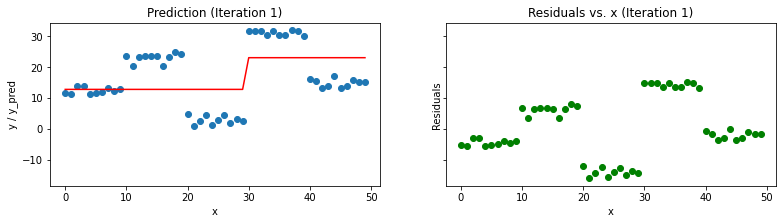

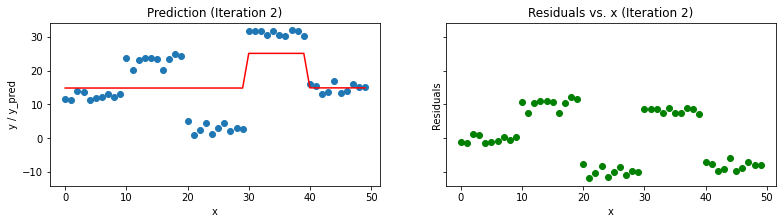

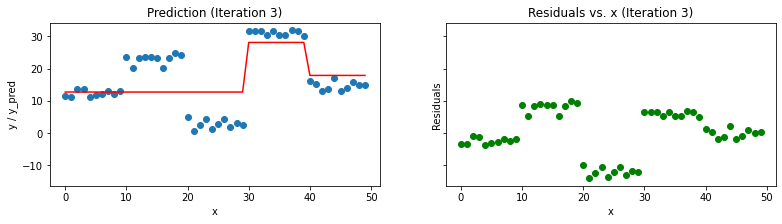

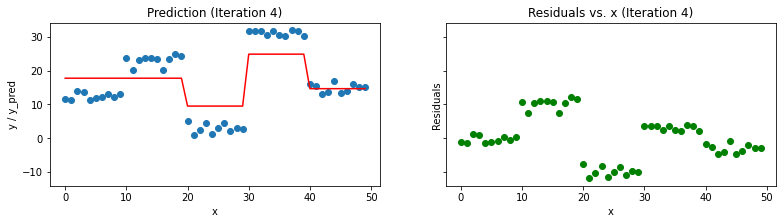

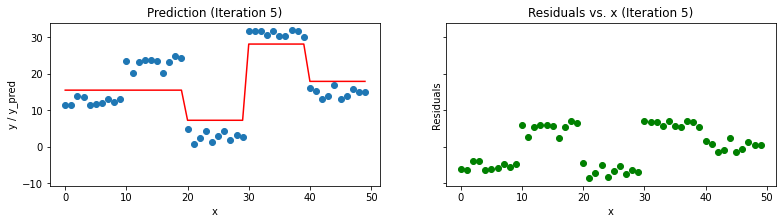

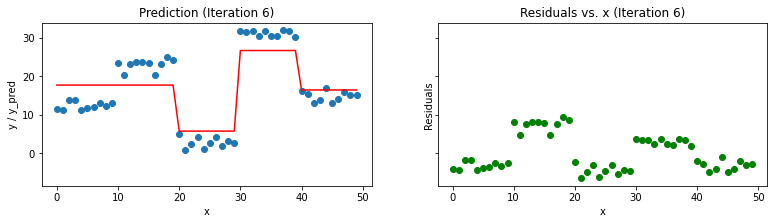

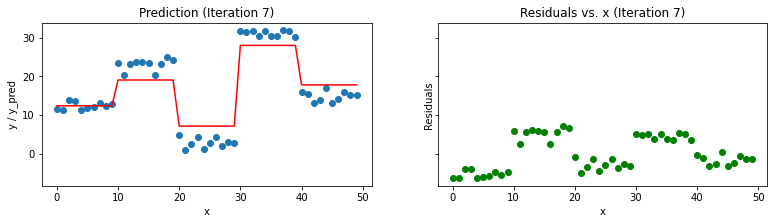

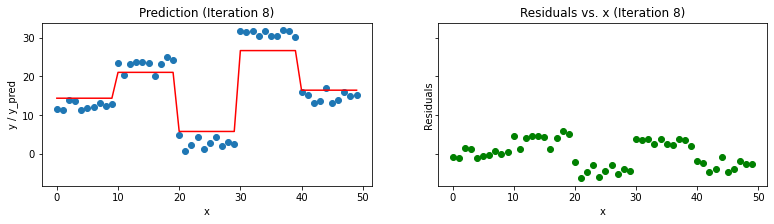

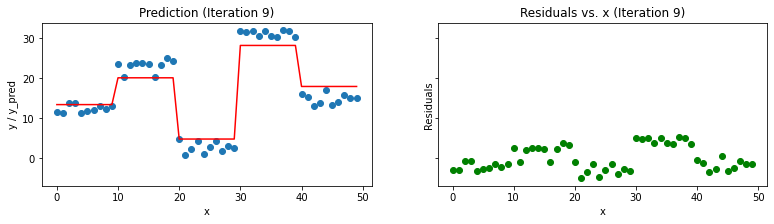

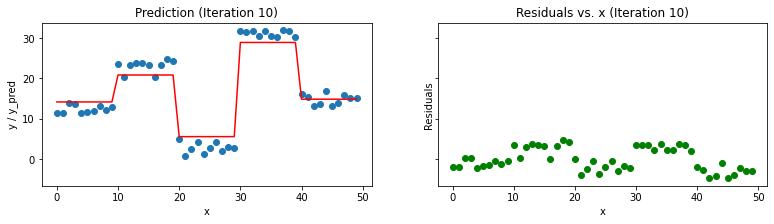

In [22]:
gradient_boost_mse(x, y, 10)